In [1]:
#execute this cell, then press 'Restart and clear cell outputs' and execute all cells except this
!pip install -U tensorflow==2.12.0rc0
!pip install -U numpy==1.18.5

  Using cached numpy-1.18.5.zip (5.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install contractions
!pip install vaderSentiment
!pip install sweetviz
!pip install textblob

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import contractions
import sweetviz as sv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import time

#importing the Lemming function from nltk library
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Direct Search Posts

In [4]:
reddit_direct_posts_dir = '/content/gdrive/MyDrive/RelevanceAnalysis/Mask_RedditDirectPosts_analyzed - RedditDirectPosts_analyzed.csv'

reddit_direct_posts = pd.read_csv(reddit_direct_posts_dir)
reddit_direct_posts = reddit_direct_posts.drop(['Unnamed: 0'], axis = 1)

print(reddit_direct_posts.shape)

(5089, 5)


In [5]:
reddit_direct_posts.head()

,content,relevance,RELEVANCE,Checked,Manual Evaluation
0,"html, css and js to react. Hello everyone, I'm...",73764.52.00,0.0,1,0
1,I can only take 7 lives of heracles. What shou...,167654.45.00,0.0,1,0
2,Creating a Shuttle Bus Service in Rural Area N...,160543.49.00,1.0,1,0
3,"http request Event and Standby. Hello,\n\nI wo...",156304.31.00,1.0,1,0
4,/boot/config-$(uname-r). “/boot/config-$(unam...,162374.48.00,1.0,1,0


In [6]:
reddit_direct_posts_checked = reddit_direct_posts[reddit_direct_posts.Checked == 1]
reddit_direct_posts_unchecked = reddit_direct_posts[reddit_direct_posts.Checked == 0]

## Filtered Search

In [7]:
reddit_filtered_posts_dir = '/content/gdrive/MyDrive/RelevanceAnalysis/Mask_RedditFilteredPosts_analyzed - RedditFilteredPosts_analyzed.csv'

reddit_filtered_posts = pd.read_csv(reddit_filtered_posts_dir)
reddit_filtered_posts = reddit_filtered_posts.drop(['Unnamed: 0'], axis = 1)

print(reddit_filtered_posts.shape)

(1292, 11)


In [8]:
reddit_filtered_posts_checked = reddit_filtered_posts[reddit_filtered_posts.Checked == 1]
reddit_filtered_posts_unchecked = reddit_filtered_posts[reddit_filtered_posts.Checked == 0]

In [9]:
reddit_posts_checked = pd.concat([reddit_filtered_posts_checked[[ 'content', 'Manual Evaluation' ]], reddit_direct_posts_checked[[ 'content', 'Manual Evaluation' ]]])

reddit_posts_checked.head()

,content,Manual Evaluation
0,My wife's cookies were probably session hijack...,0
1,HTML Smuggling Leads to Domain Wide Ransomware.,1
2,I need help with a potential virus. I need hel...,1
3,"Aura question. I have a question, is Aura a go...",0
4,Need help ruining a scam that uses Google ads ...,1


In [10]:
reddit_posts_unchecked = pd.concat([reddit_filtered_posts_unchecked[[ 'content', 'Manual Evaluation' ]], reddit_direct_posts_unchecked[[ 'content', 'Manual Evaluation' ]]])

reddit_posts_unchecked.head()

,content,Manual Evaluation
1001,"Hello, I need help in windows 11. My right cli...",0
1002,"Maldet flagged as trojan. Hey,\n\nthe maldet a...",0
1003,Anyone else got an extension flagged as trojan...,0
1004,Do I need antivirus?. So it's been upwards of ...,0
1005,Windows detecting Trojans after clean install ...,0


In [11]:
reddit_posts_checked.rename(columns={  'Manual Evaluation': 'Related', 'content' : 'full_text'}, inplace=True)
reddit_posts_unchecked.rename(columns={'Manual Evaluation': 'Related', 'content' : 'full_text'}, inplace=True)

In [12]:
reddit_posts_checked

,full_text,Related
0,My wife's cookies were probably session hijack...,0
1,HTML Smuggling Leads to Domain Wide Ransomware.,1
2,I need help with a potential virus. I need hel...,1
3,"Aura question. I have a question, is Aura a go...",0
4,Need help ruining a scam that uses Google ads ...,1
...,...,...
1008,Network Error While downloading over ethernet....,0
1009,"Unknown X Reveals Touhou Dungeon Maker Game, T...",0
1010,Email attachment size shows less size in the e...,0
1011,Path gets forwarded with quotation marks. Hell...,0


In [13]:
reddit_posts_unchecked

,full_text,Related
1001,"Hello, I need help in windows 11. My right cli...",0
1002,"Maldet flagged as trojan. Hey,\n\nthe maldet a...",0
1003,Anyone else got an extension flagged as trojan...,0
1004,Do I need antivirus?. So it's been upwards of ...,0
1005,Windows detecting Trojans after clean install ...,0
...,...,...
5084,ReconAfrica Annual General Meeting - Inaugural...,0
5085,Cannot find cause of blocked network traffic. ...,0
5086,Cant open gta 5 or any rockstar title or even ...,0
5087,What's something you learned after years of be...,0


## CS AWARE CLEANED

In [14]:
dir_cs_aware_cleaned_text = '/content/gdrive/MyDrive/RelevanceAnalysis/cs_aware_cleaned_text.csv'

cs_aware_cleaned_text = pd.read_csv(dir_cs_aware_cleaned_text)
print(cs_aware_cleaned_text.shape)

(17792, 4)


In [15]:
rows_to_remove = cs_aware_cleaned_text.sample(n=8600, random_state=42)

cs_aware_cleaned_text = cs_aware_cleaned_text.drop(rows_to_remove.index)

In [16]:
dir_not_cs_aware_cleaned_text = '/content/gdrive/MyDrive/RelevanceAnalysis/not_cs_aware_cleaned_text.csv'

not_cs_aware_cleaned_text = pd.read_csv(dir_not_cs_aware_cleaned_text)
print(not_cs_aware_cleaned_text.shape)

(7020, 6)


In [17]:
cs_aware_cleaned_text = cs_aware_cleaned_text.drop(['Unnamed: 0'], axis = 1)
not_cs_aware_cleaned_text = not_cs_aware_cleaned_text.drop(['Unnamed: 0'], axis = 1)

In [18]:
cs_aware_cleaned_text

,full_text,lang,Related
1,non transparent sharing of branch predictor wi...,en,1
2,hardware debug modes and processor init settin...,en,1
4,pan os software provides options to exclude sp...,en,1
6,a file information exposure vulnerability exis...,en,1
7,an untrusted search path vulnerability exists ...,en,1
...,...,...,...
17784,tlp is a week away beginning nov cisagov will ...,en,1
17785,another cve has been added to cisagov s known ...,en,1
17786,cisagov has another round of kev updates to st...,en,1
17789,check out cisagov s redeye it is an interactiv...,en,1


tokenize + embeddings

In [19]:
# pip install --upgrade tensorflow

In [20]:
!pip install keras-tuner
!pip install --upgrade paramiko cryptography


In [21]:
import numpy as np
import pandas as pd
import os
import json
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf
tfk = tf.keras
tfkl = tf.keras.layers

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import backend as K
from sklearn import preprocessing

import nltk # NLP
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

#Tuner
from keras_tuner.tuners import RandomSearch


In [23]:
# seed initialization
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [24]:
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [25]:
df = pd.concat([cs_aware_cleaned_text, reddit_posts_checked, not_cs_aware_cleaned_text[['full_text', 'Related']]])
df

,full_text,lang,Related
1,non transparent sharing of branch predictor wi...,en,1
2,hardware debug modes and processor init settin...,en,1
4,pan os software provides options to exclude sp...,en,1
6,a file information exposure vulnerability exis...,en,1
7,an untrusted search path vulnerability exists ...,en,1
...,...,...,...
7015,tohkkis i draw s stick men w or l offer,NaN,0
7016,it was in some such fashion that the world spo...,NaN,0
7017,goog afternoon guys who wants to support my...,NaN,0
7018,robinhanson not convenient nor liquid in low ...,NaN,0


In [26]:
df = df.drop_duplicates(subset=['full_text']).reset_index(drop = True)
print(df)
df.to_csv('cs_aware.csv')

                                               full_text lang  Related
0      non transparent sharing of branch predictor wi...   en        1
1      hardware debug modes and processor init settin...   en        1
2      pan os software provides options to exclude sp...   en        1
3      a file information exposure vulnerability exis...   en        1
4      an untrusted search path vulnerability exists ...   en        1
...                                                  ...  ...      ...
17574          tohkkis i draw   s stick men w or l offer  NaN        0
17575  it was in some such fashion that the world spo...  NaN        0
17576  goog afternoon   guys  who wants to support my...  NaN        0
17577   robinhanson not convenient nor liquid in low ...  NaN        0
17578  this really just paid my rent    chrissypodola...  NaN        0

[17579 rows x 3 columns]


<Axes: title={'center': 'Percentage of Labels'}, ylabel='Related'>

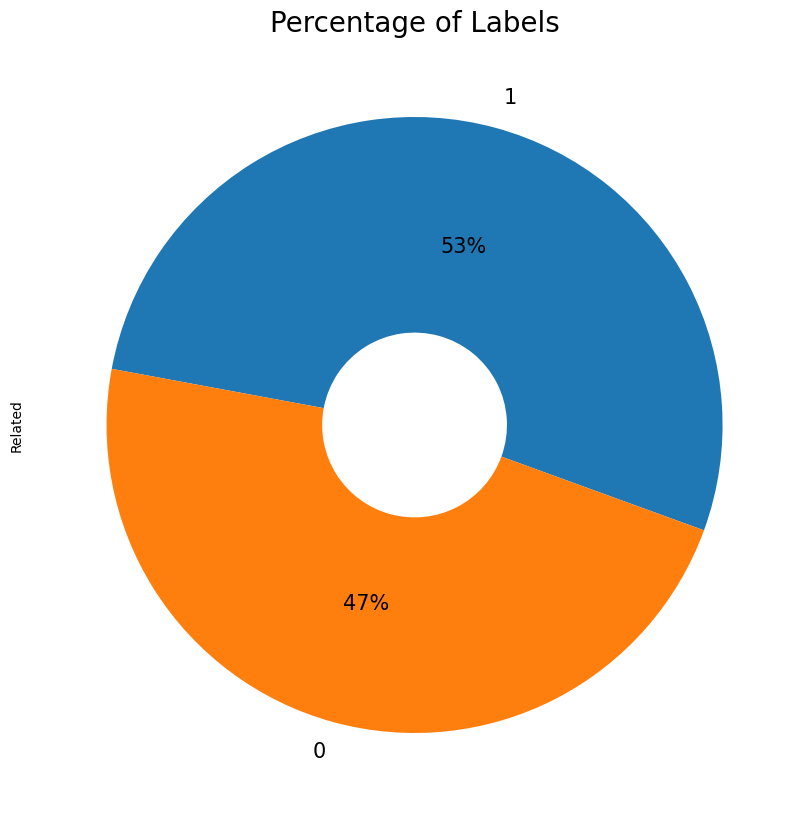

In [27]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Labels', fontsize=20)
df.Related.value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

LASER

In [28]:
!pip install torch==2.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 717.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 994.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━

In [29]:
!pip install -q laserembeddings==1.1.2
!pip install -q ftfy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchvision 0.16.0+cu121 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.


In [30]:
!pip install fastcache
# import fasttext
import ftfy
import html
import laserembeddings
import sys

from fastcache import clru_cache
from laserembeddings import Laser
from typing import List, Union
from urllib.parse import unquote

****LASER Embeddings****
This encodes each of the strings as a LASER embedding (1024 dimentional vector)

In [31]:
%%bash
# DOCS: https://github.com/facebookresearch/LASER/blob/master/install_models.sh
mkdir -p models/laser/
# for FILE in bilstm.eparl21.2018-11-19.pt eparl21.fcodes eparl21.fvocab bilstm.93langs.2018-12-26.pt 93langs.fcodes 93langs.fvocab; do
for FILE in bilstm.93langs.2018-12-26.pt 93langs.fcodes 93langs.fvocab; do
    wget -cq https://dl.fbaipublicfiles.com/laser/models/$FILE -O models/laser/$FILE
done

In [32]:
!pip install config
#from src.utils.fasttest_model import language_detect
# from src.utils.punkt_tokenizer import punkt_tokenize_sentences

config = {
    "laser": {
        "base_dir":  "./models/laser",
        "bpe_codes": "./models/laser/93langs.fcodes",
        "bpe_vocab": "./models/laser/93langs.fvocab",
        "encoder":   "./models/laser/bilstm.93langs.2018-12-26.pt",
    }
}

In [33]:
# Instantiate encoder
# BUG: CUDA GPU memory is exceeded if both laser and labse are loaded together
# @clru_cache(None)
def get_laser_model():
    laser_model = Laser(
        bpe_codes = config['laser']['bpe_codes'],
        bpe_vocab = config['laser']['bpe_vocab'],
        encoder   = config['laser']['encoder'],
        tokenizer_options = None,
        embedding_options = None
    )
    return laser_model

def laser_encode(text: Union[str, List[str]], lang='autodetect', normalize=True) -> np.ndarray:
    """
    Encodes a corpus of text using LASER
    :param text: Large block of text (will be tokenized), or list of pre-tokenized sentences
    :param lang: 2 digit language code (optional autodetect)
    :return:     embedding matrix
    """
    laser_model = get_laser_model()

    if isinstance(text, str):
        # sentences = punkt_tokenize_sentences(text, lang=lang)
        sentences = ['text']

    else:
        sentences = list(text)

    embedding = laser_model.embed_sentences(sentences, lang=lang)

    if normalize:
        embedding = embedding / np.sqrt(np.sum(embedding**2, axis=1)).reshape(-1,1)

    return embedding

THE MODEL

In [34]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Precision, Recall

# lb = LabelBinarizer()

train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10

# train_test split: test 30%
X_train, X_test, y_train, y_test = train_test_split(df['full_text'], df['Related'], test_size=0.3, random_state=0)

#test is 10% of the initial dataset, val 20%
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(12305,)
(3516,)
(1758,)


In [35]:
print('Training text lenght: ', len(X_train))
print('Validation text: ', len(X_val))
print('Testing text: ',len(X_test))

Training text lenght:  12305
Validation text:  3516
Testing text:  1758


In [36]:
X_train =laser_encode(X_train)
X_val = laser_encode(X_val)
X_test = laser_encode(X_test)

In [37]:
print('X_train.shape', X_train.shape)
print('Y_train.shape', y_train.shape)

X_train.shape (12305, 1024)
Y_train.shape (12305,)


In [38]:
X_train

array([[ 1.70289669e-02, -1.62356137e-05,  5.17064985e-03, ...,
         9.54069570e-03,  5.94475754e-02,  3.34358253e-02],
       [ 3.57297845e-02,  1.00062136e-02,  7.44074397e-03, ...,
        -6.77833741e-05,  1.65847633e-02,  1.83727015e-02],
       [ 7.70856766e-03,  5.91590628e-03,  2.74412502e-02, ...,
         1.22249918e-02,  7.15091154e-02,  3.50817218e-02],
       ...,
       [ 2.58442238e-02, -4.61904756e-06,  4.26295213e-03, ...,
        -1.24198908e-03,  1.59820206e-02,  9.29170847e-03],
       [ 5.62080666e-02, -1.29508335e-04,  1.27887903e-02, ...,
         3.04822978e-02,  1.19761005e-02,  3.18643749e-02],
       [ 3.64039354e-02, -9.77874734e-05, -8.39411002e-03, ...,
         1.73114315e-02, -1.54462585e-03,  9.09187570e-02]], dtype=float32)

In [39]:
y_train

13076    0
10316    0
15739    0
8461     1
14974    0
        ..
9225     0
13123    0
9845     0
10799    0
2732     1
Name: Related, Length: 12305, dtype: int64

In [40]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(12305, 1024)
(3516, 1024)
(1758, 1024)


In [41]:
max_len = 1024


> Neural Network - TF Keras

This inputs a 1024 LASER embedding and outputs a 1 bit classification prediction.

A triangular shaped architecture is used, including Dropout and BatchNorm.

2022/07/06 Updated LASER models with support for over 200 languages

In [42]:
pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 10.1 MB/s eta 0:00:00


In [43]:
import tensorflow as tf
import tensorflow_addons as tfa


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0-rc0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you'

In [44]:
# Build the model

accuracy_metric = tf.keras.metrics.BinaryAccuracy()
precision_metric = Precision()
recall_metric = Recall()
f1_score_metric = tfa.metrics.F1Score(num_classes=1, threshold=0.5)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1024,)),
    tf.keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(8, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              metrics =  [ accuracy_metric, precision_metric, recall_metric, f1_score_metric ])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [45]:
epochs = 1000
batch_size = 32

In [46]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)


In [47]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2,
                    verbose=1,
                    validation_data=([X_val, y_val]),
                    callbacks=callback)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


385/385 [==============================] - 14s 24ms/step - loss: 0.6138 - binary_accuracy: 0.7006 - precision: 0.7118 - recall: 0.7286 - f1_score: 0.7201 - val_loss: 0.6393 - val_binary_accuracy: 0.5458 - val_precision: 0.5370 - val_recall: 1.0000 - val_f1_score: 0.6987
Epoch 2/1000
385/385 [==============================] - 11s 28ms/step - loss: 0.4052 - binary_accuracy: 0.8202 - precision: 0.8256 - recall: 0.8366 - f1_score: 0.8311 - val_loss: 0.2898 - val_binary_accuracy: 0.8965 - val_precision: 0.8690 - val_recall: 0.9460 - val_f1_score: 0.9059
Epoch 3/1000
385/385 [==============================] - 10s 26ms/step - loss: 0.3437 - binary_accuracy: 0.8590 - precision: 0.8632 - recall: 0.8713 - f1_score: 0.8672 - val_loss: 0.2314 - val_binary_accuracy: 0.9255 - val_precision: 0.9220 - val_recall: 0.9379 - val_f1_score: 0.9299
Epoch 4/1000
385/385 [==============================] - 11s 28ms/step - loss: 0.3093 - binary_accuracy: 0.8839 - precision: 0.8868 - recall: 0.8947 - f1_score: 0

In [48]:
model.evaluate(X_test, y_test, verbose =1)


55/55 [==============================] - 0s 3ms/step - loss: 0.0952 - binary_accuracy: 0.9676 - precision: 0.9751 - recall: 0.9610 - f1_score: 0.9680


[0.09522536396980286,
 0.967576801776886,
 0.9751130938529968,
 0.9609810709953308,
 array([0.9679955], dtype=float32)]

In [49]:
print(history.history.keys())


dict_keys(['loss', 'binary_accuracy', 'precision', 'recall', 'f1_score', 'val_loss', 'val_binary_accuracy', 'val_precision', 'val_recall', 'val_f1_score'])


In [50]:
    print('Train Accuracy')
    model.evaluate(X_train, y_train)

    print('Test Accuracy')
    model.evaluate(X_test, y_test)

Train Accuracy
385/385 [==============================] - 2s 4ms/step - loss: 0.0355 - binary_accuracy: 0.9914 - precision: 0.9964 - recall: 0.9872 - f1_score: 0.9918
Test Accuracy
55/55 [==============================] - 0s 6ms/step - loss: 0.0952 - binary_accuracy: 0.9676 - precision: 0.9751 - recall: 0.9610 - f1_score: 0.9680


[0.09522536396980286,
 0.967576801776886,
 0.9751130938529968,
 0.9609810709953308,
 array([0.9679955], dtype=float32)]

In [51]:
history.history['binary_accuracy']

[0.7006095051765442,
 0.8202356696128845,
 0.8590003848075867,
 0.8839496374130249,
 0.893295407295227,
 0.9073547124862671,
 0.9117431640625,
 0.9166192412376404,
 0.923039436340332,
 0.9266964793205261,
 0.9303535223007202,
 0.9342543482780457,
 0.9346607327461243,
 0.934823215007782,
 0.9395367503166199,
 0.9392117261886597,
 0.9420560598373413,
 0.9427062273025513,
 0.9480698704719543,
 0.9462007284164429,
 0.9431938529014587,
 0.9477448463439941,
 0.9492076635360718,
 0.9525396227836609,
 0.9524583220481873,
 0.9513205885887146,
 0.9533522725105286,
 0.9553027153015137,
 0.9523770809173584,
 0.9549776315689087,
 0.9573343992233276,
 0.95587158203125,
 0.9557903409004211,
 0.9581471085548401,
 0.9586346745491028,
 0.9587159752845764,
 0.9602600336074829,
 0.9585534334182739,
 0.9574969410896301,
 0.9593660831451416,
 0.961885392665863,
 0.9637545943260193,
 0.9617228507995605,
 0.9596911668777466,
 0.9654611945152283,
 0.9627793431282043,
 0.9627793431282043,
 0.9655424356460571,
 

In [52]:
model.save('/content/gdrive/MyDrive/RelevanceAnalysis/NewBalanced_laser2.h5')


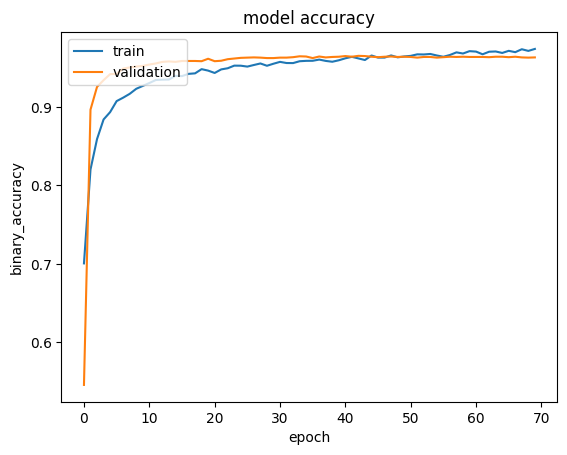

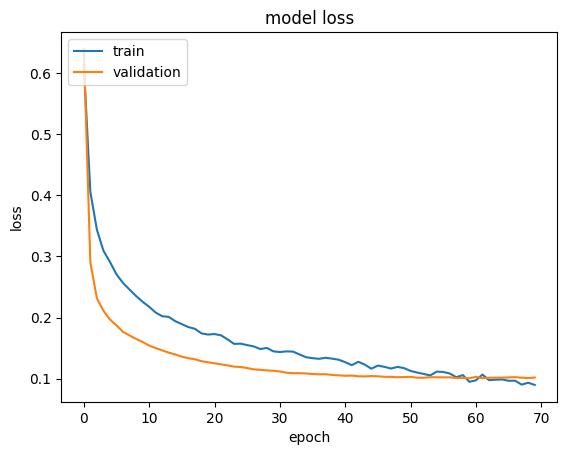

In [53]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('binary_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [55]:
prediction = model.predict(X_test)
# show the inputs and predicted outputs
#for i in range(len(X_test)):
print("X=%s, Predicted=%s" % (X_test[0], prediction[0]))

55/55 [==============================] - 0s 3ms/step
X=[ 1.0133975e-02 -9.0543821e-05 -4.5226789e-03 ...  2.1375589e-02
  2.9238377e-02  1.9836389e-02], Predicted=[0.9965268]


In [56]:
for i in range(len(prediction)):
    if (prediction[i] < 0.5):
        prediction[i] = 0
    else:
        prediction[i] = 1

In [57]:
matrix = confusion_matrix(y_test, prediction)
print(matrix)
#The diagonal entries are the accuracies of each class
matrix.diagonal()/matrix.sum(axis=1)

[[839  22]
 [ 35 862]]


array([0.97444832, 0.96098105])

In [58]:
# from mlxtend.evaluate import accuracy_score

# std_acc = accuracy_score(y_test, prediction)
# bin_acc = accuracy_score(y_test, prediction, method='binary', pos_label=1)
# avg_acc = accuracy_score(y_test, prediction, method='average')

# print(f'Standard accuracy: {std_acc*100:.2f}%')
# # print(f'Class 1 accuracy: {bin_acc*100:.2f}%')
# print(f'Average per-class accuracy: {avg_acc*100:.2f}%')

In [59]:
# # Evaluate the model on the test data using `evaluate`
# print("Evaluate on test data")
# results = model.evaluate(X_test, y_test, batch_size=128)
# print("test loss, test acc:", results)

# Try to Apply the trained model to new Data

In [68]:
dir_reddit_posts = '/content/gdrive/MyDrive/RelevanceAnalysis/UnbalancedModel - RedditPosts_analyzed.csv'

reddit_posts_df = pd.read_csv(dir_reddit_posts)
reddit_posts_df = reddit_posts_df.drop(columns=['Unnamed: 0'])

reddit_posts_df.head()

,full_text,Related,relvance unbalanced model,RELEVANCE _ UNBALANCED MODEL,Checked,Manual Evaluation
0,"TIL that the precursor to LASIK, Radial Kerato...",0,0.907081,1.0,0,0
1,False Detection?. I ran Addictive Keys' Librar...,0,0.539925,1.0,0,0
2,"The mysterious registry, why is it impossible ...",0,0.011895,0.0,0,0
3,Why is individual DSC required for ITR filing?...,0,0.145412,0.0,0,0
4,Warren the White Shark has been detected at th...,0,0.602461,1.0,0,0


In [69]:
test = laser_encode(reddit_posts_df['full_text'])

In [70]:
new_predictions = model.predict(test)

# Aggiungi le predizioni al dataframe originale
reddit_posts_df['relvance balanced model'] = new_predictions
reddit_posts_df
# Salva i risultati in un nuovo file CSV
#reddit_posts_df.to_csv('risultati_predizione.csv', index=False)

137/137 [==============================] - 1s 4ms/step


,full_text,Related,relvance unbalanced model,RELEVANCE _ UNBALANCED MODEL,Checked,Manual Evaluation,relvance balanced model
0,"TIL that the precursor to LASIK, Radial Kerato...",0,0.907081,1.0,0,0,0.193488
1,False Detection?. I ran Addictive Keys' Librar...,0,0.539925,1.0,0,0,0.123992
2,"The mysterious registry, why is it impossible ...",0,0.011895,0.0,0,0,0.012084
3,Why is individual DSC required for ITR filing?...,0,0.145412,0.0,0,0,0.767782
4,Warren the White Shark has been detected at th...,0,0.602461,1.0,0,0,0.154212
...,...,...,...,...,...,...,...
4362,Is it possible to automatically number each vi...,0,0.006431,0.0,0,0,0.016078
4363,How To Enable Or Disable Ransomware Protection...,0,0.089912,0.0,0,0,0.124732
4364,"Exception calling ""InvokeMethod"" with ""4"" argu...",0,0.002254,0.0,0,0,0.038915
4365,curious about connecting multiple networks. i ...,0,0.874945,1.0,0,0,0.687965


In [71]:
for i in range(len(new_predictions)):
    if (new_predictions[i] < 0.5):
        new_predictions[i] = 0
    else:
        new_predictions[i] = 1

In [72]:
reddit_posts_df['RELEVANCE _ BALANCED MODEL'] = new_predictions
reddit_posts_df

,full_text,Related,relvance unbalanced model,RELEVANCE _ UNBALANCED MODEL,Checked,Manual Evaluation,relvance balanced model,RELEVANCE _ BALANCED MODEL
0,"TIL that the precursor to LASIK, Radial Kerato...",0,0.907081,1.0,0,0,0.193488,0.0
1,False Detection?. I ran Addictive Keys' Librar...,0,0.539925,1.0,0,0,0.123992,0.0
2,"The mysterious registry, why is it impossible ...",0,0.011895,0.0,0,0,0.012084,0.0
3,Why is individual DSC required for ITR filing?...,0,0.145412,0.0,0,0,0.767782,1.0
4,Warren the White Shark has been detected at th...,0,0.602461,1.0,0,0,0.154212,0.0
...,...,...,...,...,...,...,...,...
4362,Is it possible to automatically number each vi...,0,0.006431,0.0,0,0,0.016078,0.0
4363,How To Enable Or Disable Ransomware Protection...,0,0.089912,0.0,0,0,0.124732,0.0
4364,"Exception calling ""InvokeMethod"" with ""4"" argu...",0,0.002254,0.0,0,0,0.038915,0.0
4365,curious about connecting multiple networks. i ...,0,0.874945,1.0,0,0,0.687965,1.0


In [73]:
neg = len(reddit_posts_df[reddit_posts_df['RELEVANCE _ BALANCED MODEL'] == 0.0])
pos = len(reddit_posts_df[reddit_posts_df['RELEVANCE _ BALANCED MODEL'] == 1.0])

ratio = pos / ( neg + pos )

print(f'Relevance Ratio: {ratio}')

Relevance Ratio: 0.09892374627891001


In [74]:
reddit_posts_df = reddit_posts_df.sample(frac=1).reset_index(drop=True)
reddit_posts_df

,full_text,Related,relvance unbalanced model,RELEVANCE _ UNBALANCED MODEL,Checked,Manual Evaluation,relvance balanced model,RELEVANCE _ BALANCED MODEL
0,Writing a public library and supporting depend...,0,0.013740,0.0,0,0,0.019742,0.0
1,The Browser Company is hiring Software Enginee...,0,0.084986,0.0,0,0,0.020470,0.0
2,"Can’t access bios, safe mode, or windows after...",0,0.013634,0.0,0,0,0.068237,0.0
3,Can't connect my DNS to domain. I have being t...,0,0.002364,0.0,0,0,0.029947,0.0
4,net/http viarables in URL paths?. I am slowly ...,0,0.008666,0.0,0,0,0.055609,0.0
...,...,...,...,...,...,...,...,...
4362,New free mining network. Successfully withdraw...,0,0.013942,0.0,0,0,0.036542,0.0
4363,Friend of mine does not good stuff and I need ...,0,0.004978,0.0,0,0,0.063273,0.0
4364,Dream Machine Threat Detection and Firewall do...,0,0.938570,1.0,0,0,0.910940,1.0
4365,"Soldiers of Company I, 3rd Battalion, 16th Inf...",0,0.060485,0.0,0,0,0.017290,0.0


In [75]:
reddit_posts_df.to_csv('/content/gdrive/MyDrive/RelevanceAnalysis/UnbalancedModel_BalancedModel - RedditPosts_analyzed.csv')